<a href="https://colab.research.google.com/github/NadeefChowdhury/Tensorflow_3_BinaryClassification/blob/main/Tensorflow_3_EarlyStopping_And_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/kc_house_data.csv')

In [ ]:
df.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [ ]:
import seaborn as sns

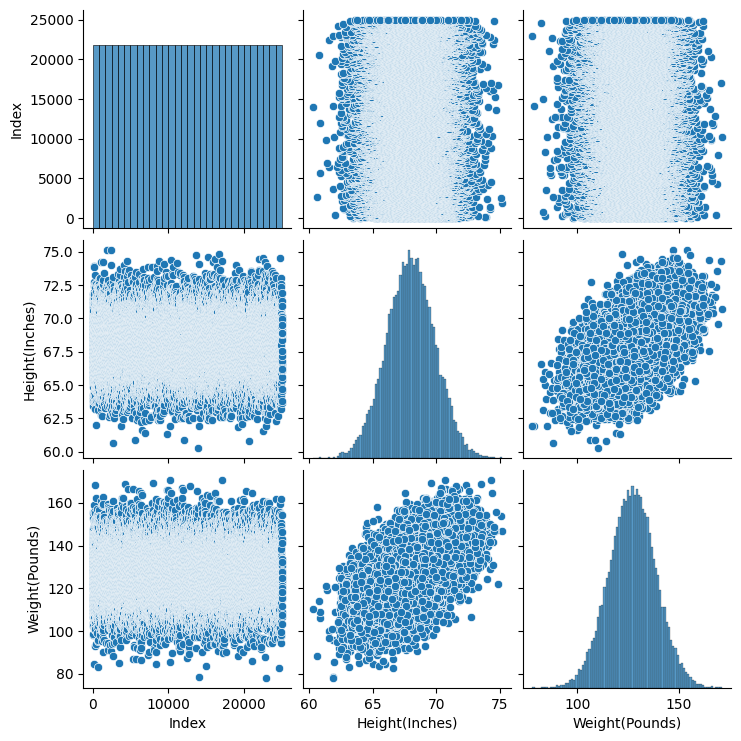

In [ ]:
sns.pairplot(df)

In [ ]:
from sklearn.model_selection import train_test_split
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
X = df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15']].values

In [ ]:
y = df['price'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape

(14480, 15)

In [ ]:
X_test.shape

(7133, 15)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential([Dense(19, activation='relu'),
                    Dense(19, activation='relu'),
                    Dense(19, activation='relu'),
                    Dense(19, activation='relu'),

                    Dense(1)])
model = Sequential()
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=400)

Epoch 1/400
114/114 [==============================] - 2s 5ms/step - loss: 416595968000.0000 - val_loss: 446414061568.0000
Epoch 2/400
114/114 [==============================] - 0s 4ms/step - loss: 415715164160.0000 - val_loss: 443410219008.0000
Epoch 3/400
114/114 [==============================] - 0s 4ms/step - loss: 404797915136.0000 - val_loss: 418391457792.0000
Epoch 4/400
114/114 [==============================] - 0s 3ms/step - loss: 353082245120.0000 - val_loss: 331086626816.0000
Epoch 5/400
114/114 [==============================] - 0s 4ms/step - loss: 237496139776.0000 - val_loss: 199224623104.0000
Epoch 6/400
114/114 [==============================] - 0s 3ms/step - loss: 142898233344.0000 - val_loss: 150947135488.0000
Epoch 7/400
114/114 [==============================] - 0s 4ms/step - loss: 127299641344.0000 - val_loss: 149228929024.0000
Epoch 8/400
114/114 [==============================] - 0s 4ms/step - loss: 127024472064.0000 - val_loss: 149109325824.0000
Epoch 9/400
114/

<Axes: >

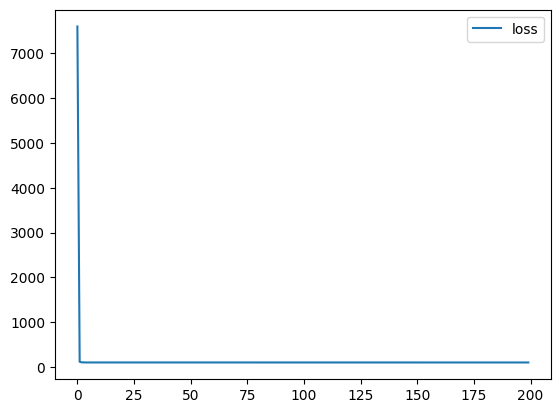

In [ ]:
pd.DataFrame(model.history.history).plot()

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

57510436864.0

In [ ]:
predictions = model.predict(X_test)

223/223 [==============================] - 0s 1ms/step


In [ ]:
predictions = pd.Series(predictions.reshape(7133,))

In [ ]:
pred_df = pd.DataFrame(y_test, columns = ['Test True Y'])


In [ ]:
pred_df = pd.concat([pred_df, predictions], axis=1)

In [ ]:
pred_df.columns = ['Test true Y', 'Model Predictions']

In [ ]:
pred_df

,Test true Y,Model Predictions
0,365000.0,5.545950e+05
1,865000.0,8.484131e+05
2,1038000.0,1.127436e+06
3,1490000.0,1.713633e+06
4,711000.0,6.235192e+05
...,...,...
7128,250000.0,4.331986e+05
7129,447500.0,4.910895e+05
7130,630000.0,4.761775e+05
7131,602000.0,6.360046e+05


<Axes: xlabel='Test true Y', ylabel='Model Predictions'>

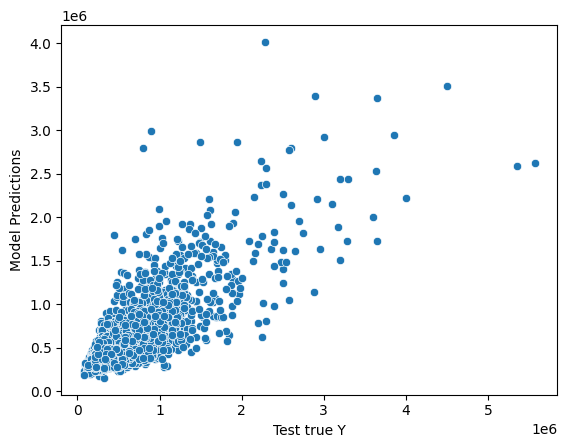

In [ ]:
sns.scatterplot(x='Test true Y', y='Model Predictions', data=pred_df.head(5000))

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32', 'B', 'M'],
      dtype='object')

In [5]:
df2 = pd.get_dummies(df['diagnosis'])
df = pd.concat([df,df2], axis=1).reindex(df.index)

In [11]:
X = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst',]].values
y = df['M'].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [16]:
X_train = scaler.fit_transform(X_train)

In [17]:
X_test = scaler.transform(X_test)

In [18]:
from tensorflow.keras.models import Sequential

In [19]:
from tensorflow.keras.layers import Dense, Dropout

In [61]:
X_train.shape, X_test.shape

((381, 30), (188, 30))

In [28]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
#BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [29]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
12/12 [==============================] - 1s 24ms/step - loss: 0.7055 - val_loss: 0.6841
Epoch 2/600
12/12 [==============================] - 0s 6ms/step - loss: 0.6683 - val_loss: 0.6477
Epoch 3/600
12/12 [==============================] - 0s 5ms/step - loss: 0.6295 - val_loss: 0.6106
Epoch 4/600
12/12 [==============================] - 0s 5ms/step - loss: 0.5924 - val_loss: 0.5702
Epoch 5/600
12/12 [==============================] - 0s 6ms/step - loss: 0.5545 - val_loss: 0.5277
Epoch 6/600
12/12 [==============================] - 0s 5ms/step - loss: 0.5115 - val_loss: 0.4869
Epoch 7/600
12/12 [==============================] - 0s 6ms/step - loss: 0.4673 - val_loss: 0.4381
Epoch 8/600
12/12 [==============================] - 0s 5ms/step - loss: 0.4203 - val_loss: 0.3962
Epoch 9/600
12/12 [==============================] - 0s 5ms/step - loss: 0.3786 - val_loss: 0.3556
Epoch 10/600
12/12 [==============================] - 0s 6ms/step - loss: 0.3392 - val_loss: 0.3193
Epoch 11

<Axes: >

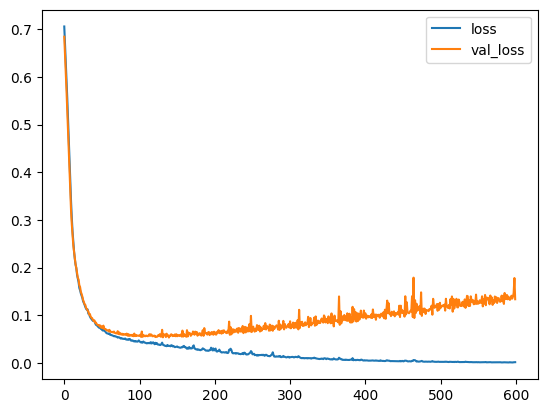

In [30]:
pd.DataFrame(model.history.history).plot()

In [34]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
#BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [35]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/600
12/12 [==============================] - 4s 88ms/step - loss: 0.7041 - val_loss: 0.6918
Epoch 2/600
12/12 [==============================] - 0s 24ms/step - loss: 0.6865 - val_loss: 0.6787
Epoch 3/600
12/12 [==============================] - 0s 17ms/step - loss: 0.6710 - val_loss: 0.6653
Epoch 4/600
12/12 [==============================] - 0s 25ms/step - loss: 0.6544 - val_loss: 0.6438
Epoch 5/600
12/12 [==============================] - 0s 16ms/step - loss: 0.6267 - val_loss: 0.6038
Epoch 6/600
12/12 [==============================] - 0s 8ms/step - loss: 0.5881 - val_loss: 0.5642
Epoch 7/600
12/12 [==============================] - 0s 8ms/step - loss: 0.5465 - val_loss: 0.5219
Epoch 8/600
12/12 [==============================] - 0s 10ms/step - loss: 0.5026 - val_loss: 0.4759
Epoch 9/600
12/12 [==============================] - 0s 9ms/step - loss: 0.4570 - val_loss: 0.4300
Epoch 10/600
12/12 [==============================] - 0s 6ms/step - loss: 0.4116 - val_loss: 0.3888
Epo

<Axes: >

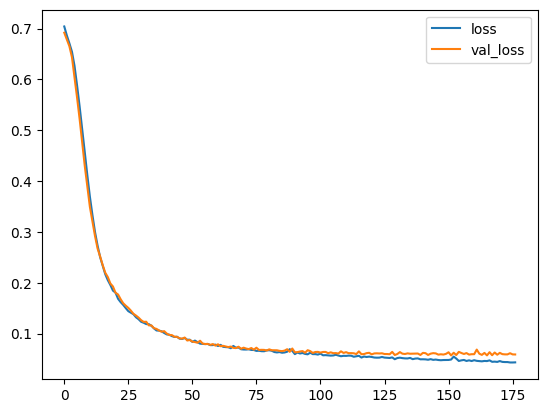

In [36]:
pd.DataFrame(model.history.history).plot()

In [63]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))
#BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [64]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/600
12/12 [==============================] - 1s 19ms/step - loss: 0.7444 - val_loss: 0.6930
Epoch 2/600
12/12 [==============================] - 0s 7ms/step - loss: 0.7057 - val_loss: 0.6788
Epoch 3/600
12/12 [==============================] - 0s 5ms/step - loss: 0.6888 - val_loss: 0.6684
Epoch 4/600
12/12 [==============================] - 0s 6ms/step - loss: 0.6728 - val_loss: 0.6568
Epoch 5/600
12/12 [==============================] - 0s 7ms/step - loss: 0.6719 - val_loss: 0.6453
Epoch 6/600
12/12 [==============================] - 0s 6ms/step - loss: 0.6490 - val_loss: 0.6318
Epoch 7/600
12/12 [==============================] - 0s 5ms/step - loss: 0.6491 - val_loss: 0.6171
Epoch 8/600
12/12 [==============================] - 0s 6ms/step - loss: 0.6270 - val_loss: 0.6006
Epoch 9/600
12/12 [==============================] - 0s 7ms/step - loss: 0.6253 - val_loss: 0.5838
Epoch 10/600
12/12 [==============================] - 0s 5ms/step - loss: 0.6103 - val_loss: 0.5656
Epoch 11

<Axes: >

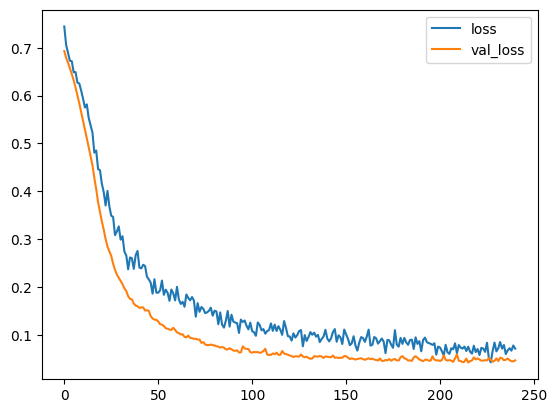

In [65]:
pd.DataFrame(model.history.history).plot()

In [67]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

6/6 [==============================] - 0s 4ms/step


In [68]:
predictions


array([[0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
    

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       121
           1       0.97      0.99      0.98        67

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188

[[119   2]
 [  1  66]]
